In [10]:
import pandas as pd

##  3. Знакомимся с новыми данными: коронавирус

In [22]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head(10)

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0
5,01/22/2020,Guangdong,China,26.0,0.0,0.0
6,01/22/2020,Guangxi,China,2.0,0.0,0.0
7,01/22/2020,Guizhou,China,1.0,0.0,0.0
8,01/22/2020,Hainan,China,4.0,0.0,0.0
9,01/22/2020,Hebei,China,1.0,0.0,0.0


In [21]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data.head(10)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
5,Afghanistan,2021-02-27,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
6,Afghanistan,2021-02-28,8200.0,8200.0,0.02,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
7,Afghanistan,2021-03-01,NaN,NaN,NaN,NaN,NaN,1580.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
8,Afghanistan,2021-03-02,NaN,NaN,NaN,NaN,NaN,1794.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
9,Afghanistan,2021-03-03,NaN,NaN,NaN,NaN,NaN,2008.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


#### Предобработка данных

In [23]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data.head()

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


In [24]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [25]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [26]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

#### Задание 3.1 - За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [28]:
covid_data.sort_values(by='date')

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
4056,2020-01-22,Japan,2.0,0.0,0.0,2.0,NaN,NaN,NaN
4055,2020-01-22,Hong Kong,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4054,2020-01-22,China,547.0,17.0,28.0,502.0,NaN,NaN,NaN
4061,2020-01-22,Thailand,4.0,0.0,2.0,2.0,NaN,NaN,NaN
4060,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45506,2021-05-29,Serbia,712046.0,6844.0,0.0,705202.0,274.0,10.0,0.0
45490,2021-05-29,Peru,1947555.0,68978.0,1897522.0,-18945.0,5501.0,162.0,4728.0
45433,2021-05-29,Iran,2893218.0,79741.0,2425033.0,388444.0,7107.0,173.0,14781.0
45523,2021-05-29,Syria,24440.0,1763.0,21593.0,1084.0,30.0,5.0,5.0


#### Задание 3.2 - За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [29]:
vaccinations_data.sort_values(by='date')

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca


#### Задание 3.3 - С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country. Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

In [30]:
covid_df = pd.merge(
    covid_data, vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [31]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Задание 3.4 - Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [34]:
mask = covid_df['country'] == 'United States'
round(covid_df[mask]['death_rate'].max(),2)

np.float64(7.19)

#### Задание 3.5 - Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [35]:
mask = covid_df['country'] == 'Russia'
round(covid_df[mask]['recover_rate'].mean(), 2)

np.float64(67.06)

## 4. Графические возможности библиотеки Pandas
#### Базовая визуализация в Pandas - plot()

In [37]:
import matplotlib

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

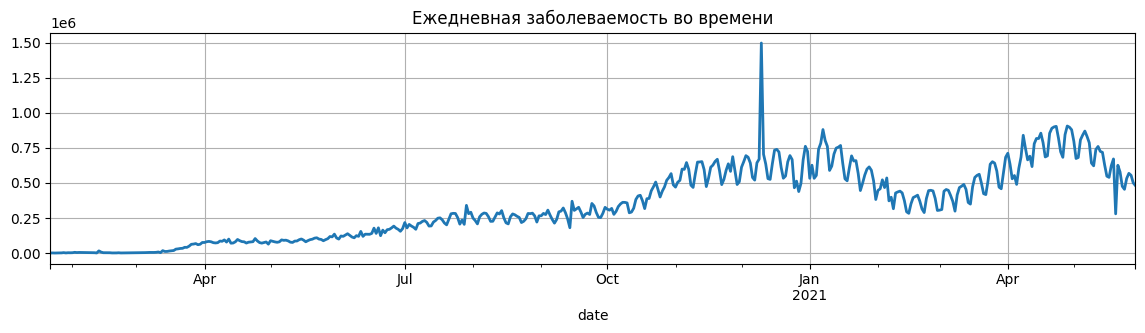

In [47]:
grouped_cases = covid_df.groupby(by='date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(14,3),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=2
)

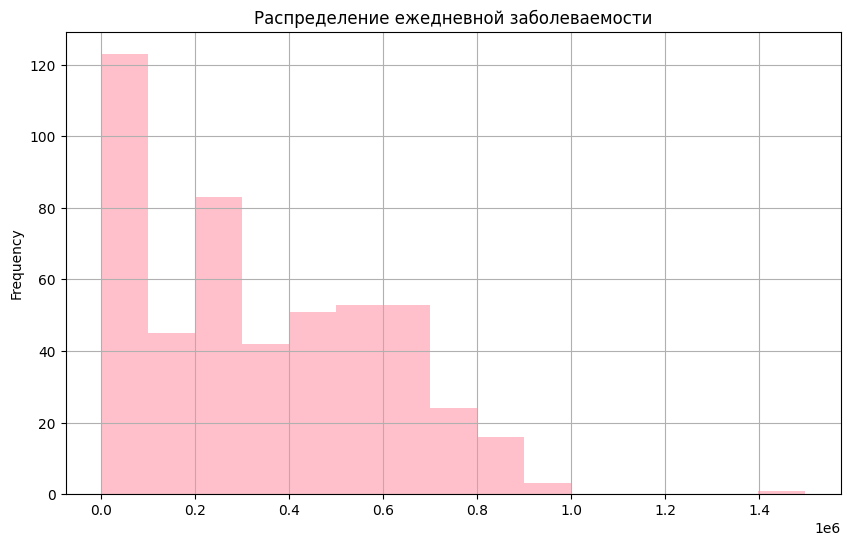

In [51]:
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='pink',
    bins=15
);

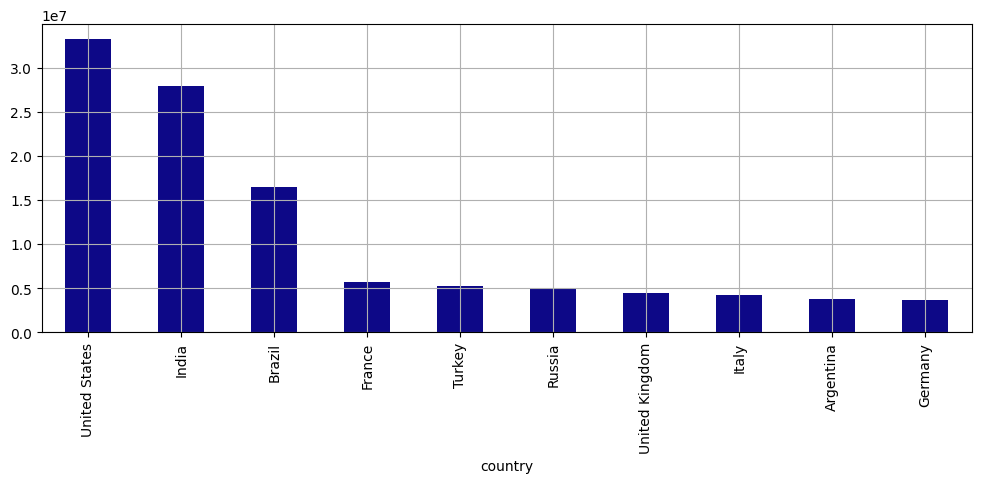

In [54]:
grouped_country = covid_df.groupby(by='country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4),
    colormap='plasma'
);

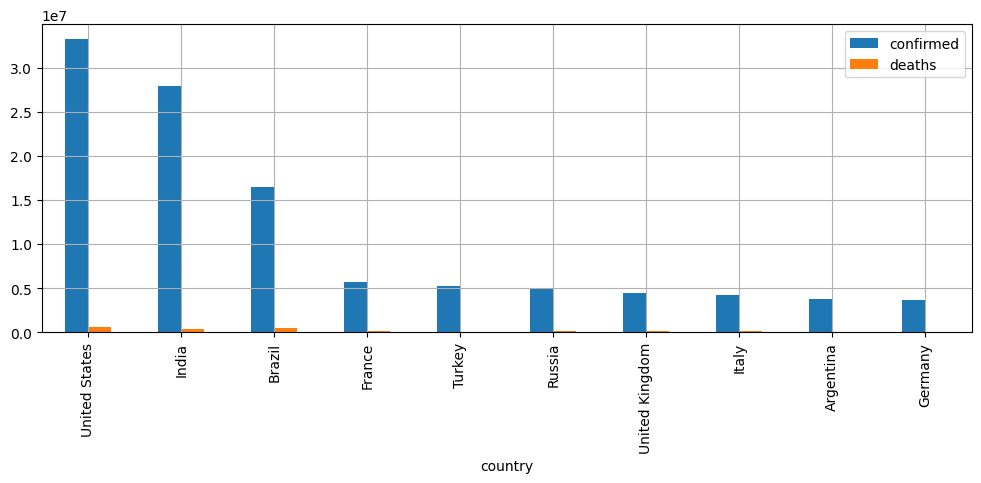

In [55]:
grouped_country = covid_df.groupby(by='country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4)
);

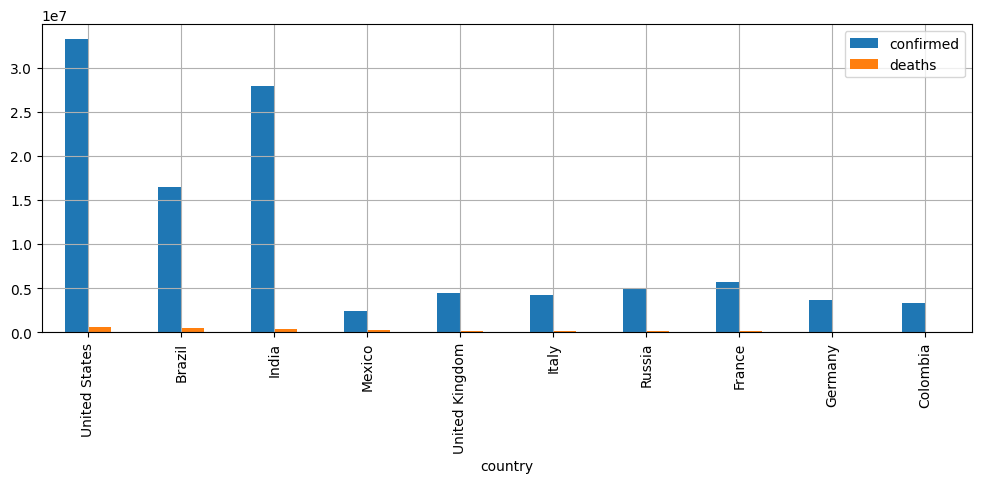

In [58]:
grouped_country = covid_df.groupby(by='country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns='deaths')
grouped_country.plot(
    kind = 'bar',
    grid=True,
    figsize=(12,4)
);